# EqualFrequencyDiscretiser

The EqualFrequencyDiscretiser() divides continuous numerical variables
into contiguous equal frequency intervals, that is, intervals that contain
approximately the same proportion of observations.

The interval limits are determined by the quantiles. The number of intervals,
i.e., the number of quantiles in which the variable should be divided is
determined by the user.

**Note**

For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.discretisation import EqualFrequencyDiscretiser

plt.rcParams["figure.figsize"] = [15,5]

In [2]:
data = pd.read_csv('housing.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set
X = data.drop(["Id", "SalePrice"], axis=1)
y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print("X_train :", X_train.shape)
print("X_test :", X_test.shape)

X_train : (1022, 79)
X_test : (438, 79)


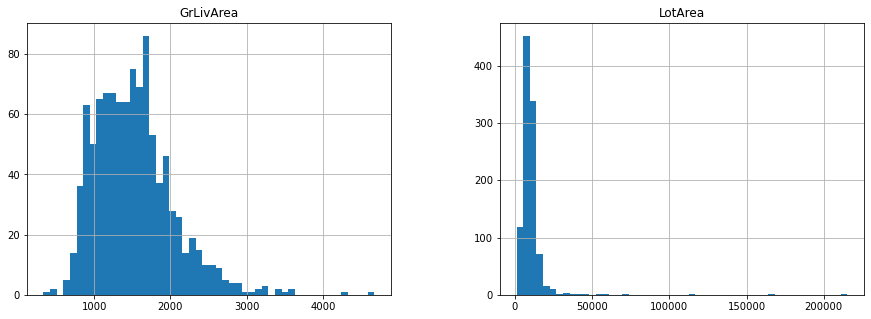

In [4]:
# we will use two continuous variables for transformation

X_train[["LotArea", 'GrLivArea']].hist(bins=50)

plt.show()

The EqualFrequencyDiscretiser() works only with numerical variables.
A list of variables can be passed as argument. Alternatively, the discretiser
will automatically select and transform all numerical variables.

The EqualFrequencyDiscretiser() first finds the boundaries for the intervals or
quantiles for each variable, fit.

Then it transforms the variables, that is, it sorts the values into the intervals,
transform.


In [5]:
'''
Parameters
----------

q : int, default=10
    Desired number of equal frequency intervals / bins. In other words the
    number of quantiles in which the variables should be divided.

variables : list
    The list of numerical variables that will be discretised. If None, the
    EqualFrequencyDiscretiser() will select all numerical variables.

return_object : bool, default=False
    Whether the numbers in the discrete variable should be returned as
    numeric or as object. The decision is made by the user based on
    whether they would like to proceed the engineering of the variable as
    if it was numerical or categorical.

return_boundaries: bool, default=False
    whether the output should be the interval boundaries. If True, it returns
    the interval boundaries. If False, it returns integers.
'''

efd = EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'])

efd.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=False, return_object=False,
                          variables=['LotArea', 'GrLivArea'])

In [6]:
# binner_dict contains the boundaries of the different bins
efd.binner_dict_

{'LotArea': [-inf,
  5007.1,
  7164.6,
  8165.700000000001,
  8882.0,
  9536.0,
  10200.0,
  11046.300000000001,
  12166.400000000001,
  14373.9,
  inf],
 'GrLivArea': [-inf,
  912.0,
  1069.6000000000001,
  1211.3000000000002,
  1344.0,
  1479.0,
  1603.2000000000003,
  1716.0,
  1893.0000000000005,
  2166.3999999999996,
  inf]}

In [7]:
train_t = efd.transform(X_train)
test_t = efd.transform(X_test)

In [8]:
# the numbers are the different bins into which the observations
# were sorted
train_t['GrLivArea'].unique()

array([8, 3, 0, 4, 1, 2, 6, 9, 7, 5], dtype=int64)

In [9]:
# the numbers are the different bins into which the observations
# were sorted
train_t['LotArea'].unique()

array([4, 0, 2, 3, 1, 7, 5, 8, 6, 9], dtype=int64)

In [10]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([X_train[["LotArea", 'GrLivArea']], train_t[["LotArea", 'GrLivArea']]], axis=1)
tmp.columns = ["LotArea", 'GrLivArea',"LotArea_binned", 'GrLivArea_binned']
tmp.head()

,LotArea,GrLivArea,LotArea_binned,GrLivArea_binned
64,9375,2034,4,8
682,2887,1291,0,3
960,7207,858,2,0
1384,9060,1258,4,3
1100,8400,438,3,0


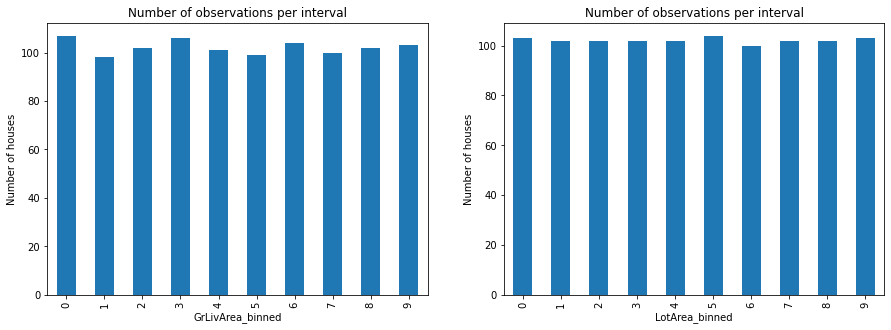

In [11]:
# in  equal frequency discretisation, we obtain the same amount of observations
# in each one of the bins.
plt.subplot(1,2,1)
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.title('Number of observations per interval')

plt.subplot(1,2,2)
tmp.groupby('LotArea_binned')['LotArea'].count().plot.bar()
plt.ylabel('Number of houses')
plt.title('Number of observations per interval')

plt.show()

### Return interval limits instead

In [12]:
# Now, let's return bin boundaries instead

efd = EqualFrequencyDiscretiser(
    q=10, variables=['LotArea', 'GrLivArea'], return_boundaries=True)

efd.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_boundaries=True, return_object=False,
                          variables=['LotArea', 'GrLivArea'])

In [13]:
train_t = efd.transform(X_train)
test_t = efd.transform(X_test)

In [14]:
# the numbers are the different bins into which the observations
# were sorted
np.sort(np.ravel(train_t['GrLivArea'].unique()))

array([Interval(-inf, 912.0, closed='right'),
       Interval(912.0, 1069.6, closed='right'),
       Interval(1069.6, 1211.3, closed='right'),
       Interval(1211.3, 1344.0, closed='right'),
       Interval(1344.0, 1479.0, closed='right'),
       Interval(1479.0, 1603.2, closed='right'),
       Interval(1603.2, 1716.0, closed='right'),
       Interval(1716.0, 1893.0, closed='right'),
       Interval(1893.0, 2166.4, closed='right'),
       Interval(2166.4, inf, closed='right')], dtype=object)

In [15]:
np.sort(np.ravel(test_t['GrLivArea'].unique()))

array([Interval(-inf, 912.0, closed='right'),
       Interval(912.0, 1069.6, closed='right'),
       Interval(1069.6, 1211.3, closed='right'),
       Interval(1211.3, 1344.0, closed='right'),
       Interval(1344.0, 1479.0, closed='right'),
       Interval(1479.0, 1603.2, closed='right'),
       Interval(1603.2, 1716.0, closed='right'),
       Interval(1716.0, 1893.0, closed='right'),
       Interval(1893.0, 2166.4, closed='right'),
       Interval(2166.4, inf, closed='right')], dtype=object)